In [ ]:
#!pip install backtrader

In [1]:
from datetime import datetime
import backtrader as bt
import matplotlib

matplotlib.__version__

'3.2.2'

In [2]:
cerebro = bt.Cerebro()

In [3]:
# Create a Stratey
class TestStrategy(bt.Strategy):

    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close

    def log(self, txt, dt=None):
        '''Logging function for this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print(f'{dt.isoformat()}, {txt}')

    def next(self):
        # Simply log the closing price of the series from the reference
        self.log(f"Close, {self.dataclose[0]}")

In [4]:
# Add a strategy
cerebro.addstrategy(TestStrategy)

0

In [5]:
data = bt.feeds.YahooFinanceData(dataname='^NSEI', fromdate=datetime(2020, 1, 1),
                                  todate=datetime(2021, 2, 16))
cerebro.adddata(data)

In [6]:
cerebro.broker.setcash(1_00_000.0)

In [7]:
print(f'Starting Portfolio Value: {cerebro.broker.getvalue()}')

Starting Portfolio Value: 100000.0


In [8]:
%%time
cerebro.run()

2020-01-01, Close, 12182.5
2020-01-02, Close, 12282.2
2020-01-03, Close, 12226.65
2020-01-06, Close, 11993.05
2020-01-07, Close, 12052.95
2020-01-08, Close, 12025.35
2020-01-09, Close, 12215.9
2020-01-10, Close, 12256.8
2020-01-13, Close, 12329.55
2020-01-14, Close, 12362.3
2020-01-15, Close, 12343.3
2020-01-16, Close, 12355.5
2020-01-17, Close, 12352.35
2020-01-20, Close, 12224.55
2020-01-21, Close, 12169.85
2020-01-22, Close, 12106.9
2020-01-23, Close, 12180.35
2020-01-24, Close, 12248.25
2020-01-27, Close, 12119.0
2020-01-28, Close, 12055.8
2020-01-29, Close, 12129.5
2020-01-30, Close, 12035.8
2020-01-31, Close, 11962.1
2020-02-03, Close, 11707.9
2020-02-04, Close, 11979.65
2020-02-05, Close, 12089.15
2020-02-06, Close, 12137.95
2020-02-07, Close, 12098.35
2020-02-10, Close, 12031.5
2020-02-11, Close, 12107.9
2020-02-12, Close, 12201.2
2020-02-13, Close, 12174.65
2020-02-14, Close, 12113.45
2020-02-17, Close, 12045.8
2020-02-18, Close, 11992.5
2020-02-19, Close, 12125.9
2020-02-20, 

In [9]:
print(f'Final Portfolio Value: {cerebro.broker.getvalue()}')

Final Portfolio Value: 100000.0


<IPython.core.display.Javascript object>


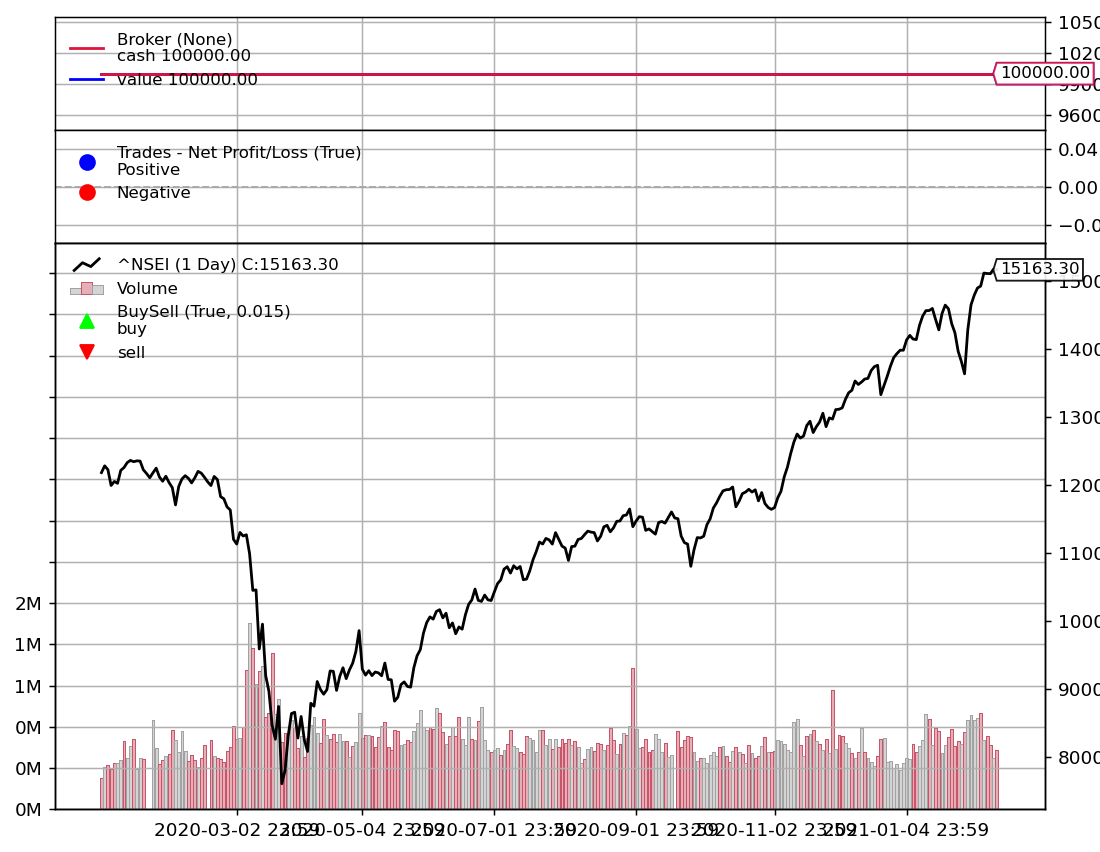

[[<Figure size 640x480 with 4 Axes>]]

In [10]:
cerebro.plot()